# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     --- --------------------------------- 61.4/675.6 kB 648.1 kB/s eta 0:00:01
     -------------------------- ----------- 471.0/675.6 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for kdtree>=0.12 from https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl.metadata
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=bee3f46886409653b55f3f47cdd096542729695640270761f912f3a2995a1b05
  Stored in directory: c:\users\vgp_1\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=593)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=593)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(len(lats))
print(len(lngs))
print(len(cities))
cities

Number of cities in the list: 308
593
593
308


['inarajan village',
 'ilulissat',
 'saint-pierre',
 'el abiodh sidi cheikh',
 'thompson',
 'hamilton',
 'bethel',
 'yuzhno-kurilsk',
 'forster',
 'edinburgh of the seven seas',
 'adamstown',
 'lihue',
 'freetown',
 'namtsy',
 'magadan',
 'port-aux-francais',
 'grytviken',
 'philadelphia',
 'klyuchi',
 'san patricio',
 'utrik',
 'dalandzadgad',
 'albany',
 'blackmans bay',
 'longyearbyen',
 'oranjemund',
 'sur',
 'tayshet',
 'rio grande',
 'kuraymah',
 'coquimbo',
 'carnarvon',
 'chifeng',
 'kargasok',
 'margaret river',
 'vorkuta',
 'bredasdorp',
 'russkaya polyana',
 'trinity beach',
 'khovd',
 "abraham's bay",
 'iqaluit',
 'punta arenas',
 'soio',
 'tiksi',
 'akureyri',
 "st. john's",
 'vadso',
 'vorgashor',
 'talnakh',
 'yellowknife',
 'enewetak',
 'georgetown',
 'nova sintra',
 'rosetta',
 'badger',
 'merizo village',
 'nova olimpia',
 'kuanda',
 'waitangi',
 'juneau',
 'suihua',
 'bilibino',
 'kavaratti',
 "cooper's town",
 'remire-montjoly',
 'udachny',
 'saipan',
 'plesetsk',
 

In [4]:
cities_blocks_of150 = []
lats_blocks_of150 =[]
lngs_blocks_of150 = []

dict_citi = {}
dict_lat = {}
dict_lngs = {}
for i in range(0, len(cities),150):
    cities_blocks_of150.append(cities[i:i+150])
for k in range(0, len(lats),150):
    lats_blocks_of150.append(lats[k:k+150])
for l in range(0, len(lngs),150):
    lngs_blocks_of150.append(lngs[l:l+150])
    
for ind, j in enumerate(cities_blocks_of150):  
    dict_citi[ind] = j
for ind, k in enumerate(lats_blocks_of150):
    dict_lat[ind] = k
for ind, l in enumerate(lngs_blocks_of150):
    dict_lngs[ind] =l
print(len(dict_citi[0]))
print(len(dict_lat[0]))
print(len(dict_lngs[0]))


150
150
150


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
units = "meters"
response_t = []# first 50 set of json response for first 50 lat and long
url_city_name = "https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
num_cities_found = len(cities)
# Define an empty list to fetch the weather data for each city
city_data = []
first_fifty_cities =[]
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 0
set_count = 0
new_lats = []
new_lngs = []
lat_lng = []
# Loop through all the cities in our list to fetch weather data
df_cities = pd.DataFrame({"city_names":dict_citi[0],"latitude":dict_lat[0],"longitude":dict_lngs[0]})
# Group cities in sets of 50 for logging purposes
n = df_cities.loc[:, ["latitude", "longitude"]].to_dict()
my_cols = ["latitude", "longitude"]
output_list = [n[x] for x in my_cols]

for i in range(len(output_list)-1):
    for key,val in output_list[0].items():
        new_lats.append(val)
    for key, value in output_list[1].items():
        new_lngs.append(value)
lat_lng = [item for sublist in zip(new_lats, new_lngs) for item in sublist]
   
df_cities.tail(5)
output_list
n
print(f"zipped lat_lng: {lat_lng}")

Beginning Data Retrieval     
-----------------------------
zipped lat_lng: [9.137373901727443, 145.9035965449093, 74.1696892613337, -39.060708395792574, 40.52924134841567, -54.09171788212156, 32.07477795938043, 0.18528211759175406, 58.80021837250041, -98.72023384882472, 28.646407912371814, -69.97875901950529, 57.10020470934785, -167.3497495383484, 44.131353562806396, 153.80379171875876, -36.116672199285844, 159.92872750548327, -35.230515583426715, -13.823468983274353, -31.323824363977728, -131.91508637258744, 17.402116668965547, -170.52918492157914, 1.1970286590506163, -22.131698282060512, 64.64123875810253, 130.26081236085628, 57.66263795920426, 147.30409145040295, -33.32038837408641, -134.22832280091535, -77.2883938160843, 59.88605690391199, -48.511276272346876, -45.68560791840815, 32.805791966666206, -88.8472873612866, -65.91650974561182, -20.58826531042257, 43.02576745068717, 177.90429929513516, 8.362689782614595, -112.34333598147997, 18.852574033736985, 175.72563743176437, 42.679

In [6]:
for elem in range(len(lat_lng)-1):
    url_lat_lng = f"https://api.openweathermap.org/data/2.5/weather?lat={lat_lng[elem]}&lon={lat_lng[elem +1]}&appid={weather_api_key}"
    response_first_fifty = requests.get(url_lat_lng)      
    response_t.append(response_first_fifty.json())
print(response_t)

[{'coord': {'lon': 145.9036, 'lat': 9.1374}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.76, 'feels_like': 304.3, 'temp_min': 300.76, 'temp_max': 300.76, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.72, 'deg': 70, 'gust': 10.97}, 'clouds': {'all': 84}, 'dt': 1712119058, 'sys': {'sunrise': 1712088761, 'sunset': 1712132779}, 'timezone': 36000, 'id': 0, 'name': '', 'cod': 200}, {'cod': '400', 'message': 'wrong latitude'}, {'coord': {'lon': -39.0607, 'lat': 74.1697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 250.86, 'feels_like': 243.86, 'temp_min': 250.86, 'temp_max': 250.86, 'pressure': 1034, 'humidity': 99, 'sea_level': 1034, 'grnd_level': 700}, 'visibility': 675, 'wind': {'speed': 4.82, 'deg': 269, 'gust': 8.25}, 'clouds': {'all': 100}, 'dt': 1

In [7]:
import numpy as np
city_weatherdata_df = pd.DataFrame(response_t)
key_list = []; value_list = []; emptyv = ''
#print(city_weatherdata_df['main'])
coord_citydata = city_weatherdata_df['coord']#cleaned of nans
city_weatherdata = city_weatherdata_df['main'] #cleaned of nans
city_winddata = city_weatherdata_df['wind'] #cleaned of nans
city_clouddata = city_weatherdata_df['clouds'] #cleaned of nans
CityCloudData_df = pd.DataFrame(city_clouddata)
newcityclouddata_df=CityCloudData_df.dropna()
newcityclouddata_df.head() #extracted cloudiness data
newcoord_citydf = pd.DataFrame(coord_citydata)
newcleaned_coordsdf=newcoord_citydf.dropna()
newcleaned_coordsdf #extracted lat and lngs
new__weather_df = pd.DataFrame(city_weatherdata)
new_cleaned_weatherdata = new__weather_df.dropna()
new_cleaned_weatherdata # extracted humidity and temp_max
new_winddata = pd.DataFrame(city_winddata)
newcleaned_winddata = new_winddata.dropna()
newcleaned_winddata #extracted wind_speed
clouds = []; cloudiness = []
for index, row in newcityclouddata_df.iterrows():
    clouds.append(row[0])
for i in range(len(clouds)):
    for k, v in clouds[i].items():
        cloudiness.append(v)
len(cloudiness)  #ready cloudiness array for the first 50 cities

231

In [8]:
#extracting coordinates
coords = []; coordinates =[]; lats = []; lngs = [];
for index, row in newcleaned_coordsdf.iterrows():
    coords.append(row[0])
b=coords[i].items()
keys = ['lon', 'lat']
for i in range(len(coords)):
    lngs.append(coords[i]['lon'])
    lats.append(coords[i]['lat'])
lngs
len(lngs)


231

In [9]:
#max temp and humidity
temperature_max = []; hum =[]; ws = []; wind_speed = []
temperature_data=new_cleaned_weatherdata['main'].array
for k in range(len(temperature_data)):
    temperature_max.append(temperature_data[k]['temp_max'])
    hum.append(temperature_data[k]['humidity'])
temperature_max
hum
for index, row in newcleaned_winddata.iterrows():
    ws.append(row[0])
for P in range(len(ws)):
    wind_speed.append(ws[P]['speed'])
len(wind_speed)
len(hum)
len(temperature_max)

231

In [10]:
import datetime
Country_Datas = []
location=city_weatherdata_df['sys']
date = city_weatherdata_df['dt']
location_country_df= pd.DataFrame(location)
country_data=location_country_df.dropna()
#for j in range(len(country_data)):      
#    print(country_data[j]['country'])
dt_array= date.dropna()
dates_weatherdata = dt_array.array
#dates_weatherdata
cd=country_data['sys'].array
for l in range(len(cd)):
    if 'country' in cd[l]:
        Country_Datas.append(cd[l]['country'])
    else:
        Country_Datas.append("no country info")

len(Country_Datas)      


231

In [11]:
# Convert the cities weather data into a Pandas DataFrame
dict_cities = {"city_names":cities[:len(cloudiness)],"latitude": lats, "longitude":lngs,"Wind_Speed":wind_speed,"Max_temp": temperature_max,"Cloudiness":cloudiness, "Humidity":hum, "Country":Country_Datas, "Date":dates_weatherdata}
city_data_df = pd.DataFrame(dict_cities)

# Show Record Count
city_data_df.count()

city_names    231
latitude      231
longitude     231
Wind_Speed    231
Max_temp      231
Cloudiness    231
Humidity      231
Country       231
Date          231
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,city_names,latitude,longitude,Wind_Speed,Max_temp,Cloudiness,Humidity,Country,Date
0,inarajan village,9.1374,145.9036,8.72,300.76,84,80,no country info,1.712119e+09
1,ilulissat,74.1697,-39.0607,4.82,250.86,100,99,no country info,1.712119e+09
2,saint-pierre,-39.0607,40.5292,15.28,293.45,100,84,no country info,1.712119e+09
3,el abiodh sidi cheikh,40.5292,-54.0917,10.08,281.53,100,68,no country info,1.712119e+09
4,thompson,-54.0917,32.0748,3.81,275.51,99,80,no country info,1.712119e+09


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,city_names,latitude,longitude,Wind_Speed,Max_temp,Cloudiness,Humidity,Country,Date
City_ID,,,,,,,,,
0,inarajan village,9.1374,145.9036,8.72,300.76,84,80,no country info,1.712119e+09
1,ilulissat,74.1697,-39.0607,4.82,250.86,100,99,no country info,1.712119e+09
2,saint-pierre,-39.0607,40.5292,15.28,293.45,100,84,no country info,1.712119e+09
3,el abiodh sidi cheikh,40.5292,-54.0917,10.08,281.53,100,68,no country info,1.712119e+09
4,thompson,-54.0917,32.0748,3.81,275.51,99,80,no country info,1.712119e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

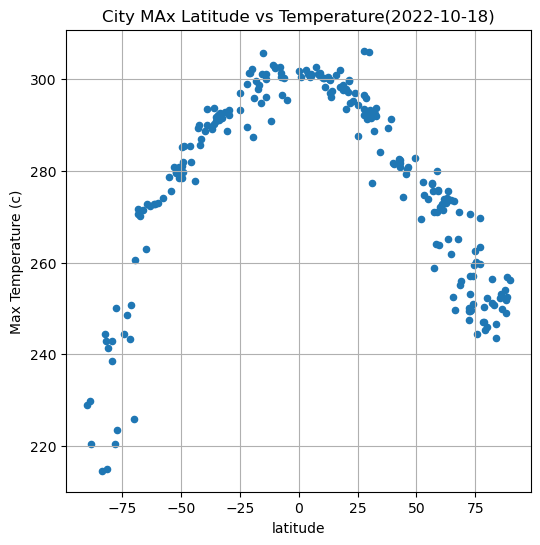

<Figure size 640x480 with 0 Axes>

In [21]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="latitude", y="Max_temp", grid=True,figsize=(6,6), title = "City MAx Latitude vs Temperature(2022-10-18)")
# Incorporate the other graph properties
plt.ylabel("Max Temperature (c)")
plt.xlabel("latitude")
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

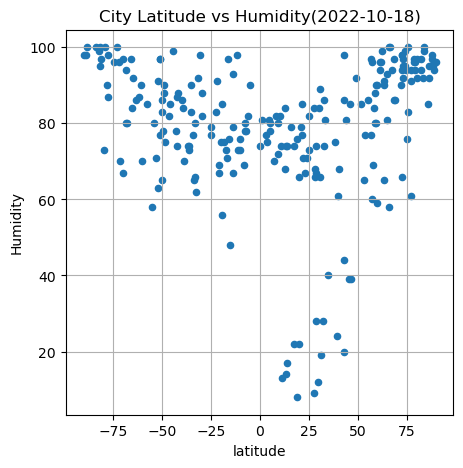

<Figure size 640x480 with 0 Axes>

In [22]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="latitude", y="Humidity", grid=True,figsize=(5,5), title = "City Latitude vs Humidity(2022-10-18)")
# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("latitude")
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

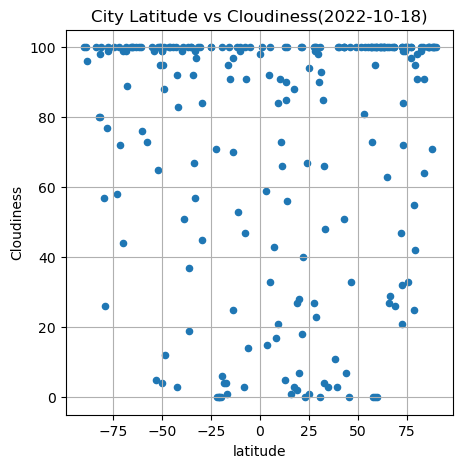

<Figure size 640x480 with 0 Axes>

In [23]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="latitude", y="Cloudiness", grid=True,figsize=(5,5), title = "City Latitude vs Cloudiness(2022-10-18)")

# Incorporate the other graph properties
plt.ylabel("Cloudiness")
plt.xlabel("latitude")
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

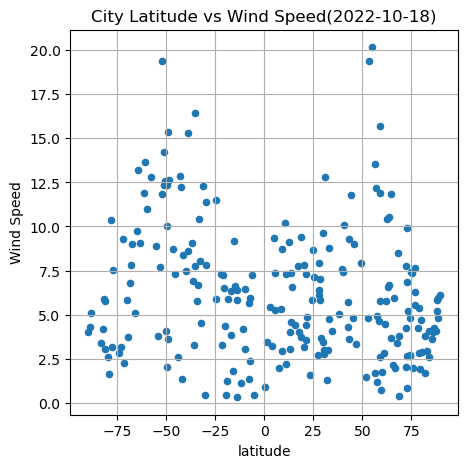

<Figure size 640x480 with 0 Axes>

In [24]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="latitude", y="Wind_Speed", grid=True,figsize=(5,5), title = "City Latitude vs Wind Speed(2022-10-18)")

# Incorporate the other graph properties
plt.ylabel("Wind Speed")
plt.xlabel("latitude")
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
from sklearn.linear_model import LinearRegression
     

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['latitude'] >=0]
    
# Display sample data
northern_hemi_df.head()


,city_names,latitude,longitude,Wind_Speed,Max_temp,Cloudiness,Humidity,Country,Date
City_ID,,,,,,,,,
0,inarajan village,9.1374,145.9036,8.72,300.76,84,80,no country info,1.712119e+09
1,ilulissat,74.1697,-39.0607,4.82,250.86,100,99,no country info,1.712119e+09
3,el abiodh sidi cheikh,40.5292,-54.0917,10.08,281.53,100,68,no country info,1.712119e+09
5,hamilton,32.0748,0.1853,1.31,288.69,85,28,DZ,1.712119e+09
6,bethel,0.1853,58.8002,0.87,301.83,98,74,no country info,1.712119e+09


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['latitude']< 0]

# Display sample data
southern_hemi_df.head()

,city_names,latitude,longitude,Wind_Speed,Max_temp,Cloudiness,Humidity,Country,Date
City_ID,,,,,,,,,
2,saint-pierre,-39.0607,40.5292,15.28,293.45,100,84,no country info,1.712119e+09
4,thompson,-54.0917,32.0748,3.81,275.51,99,80,no country info,1.712119e+09
9,edinburgh of the seven seas,-69.9788,57.1002,5.85,225.80,44,97,no country info,1.712119e+09
12,freetown,-36.1167,159.9287,6.93,293.83,37,74,no country info,1.712119e+09
13,namtsy,-35.2305,-13.8235,7.78,291.77,100,83,no country info,1.712119e+09


###  Temperature vs. Latitude Linear Regression Plot

rvalue is : -0.947729462349991, stderr = 0.02019751559859665
yvalue = y = -0.69x +309.98


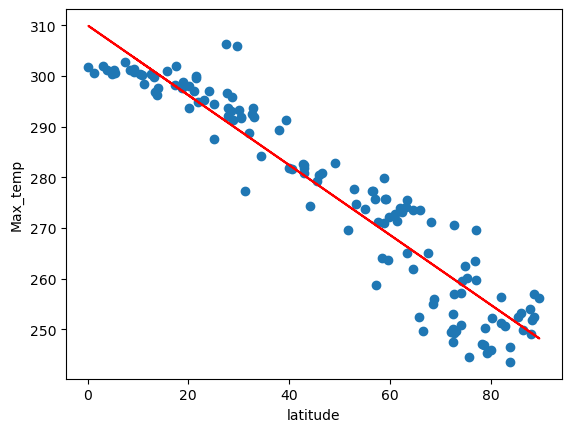

In [28]:
# Linear regression on Northern Hemisphere creating x and y values
y_values = northern_hemi_df['Max_temp'].array
x_values = northern_hemi_df['latitude'].array
#finding slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
#regression values
regress_values = x_values *slope +intercept
#line equation formula
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('latitude')
plt.ylabel('Max_temp')
#plt.figtext(5,5,s=line_eq,fontsize=15, color= 'red')
print(f"rvalue is : {rvalue}, stderr = {stderr}")
print(f"yvalue = {line_eq}")

rvalue is : 0.9027083000682307, stderr= 0.043287849782704974


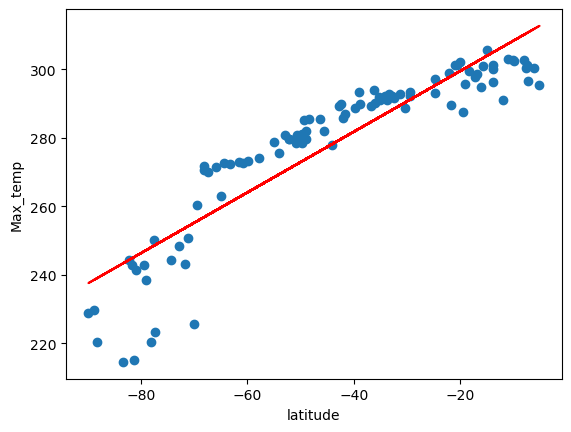

In [29]:
# Linear regression on Southern Hemisphere
y_value = southern_hemi_df['Max_temp'].array
x_value = southern_hemi_df['latitude'].array
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
#regression values
regress_val = x_value *slope +intercept
#line equation 
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_val, "r-")
plt.xlabel("latitude")
plt.ylabel("Max_temp")
plt.annotate(line_equation, (25,10), color='red')
print(f"rvalue is : {rvalue}, stderr= {stderr}")

**Discussion about the linear relationship: the linear relationship has the least error in northernhemisphere and most fitted. this is detected by checking the rsquare value for both northern and southern dataframes. The values are much close to the center line that shows the linear regression model is correct for this dataset.

### Humidity vs. Latitude Linear Regression Plot

rvalue is : 0.5132156329418249, stderr = 0.06588093776989135
yvalue = y = 0.45x +54.52


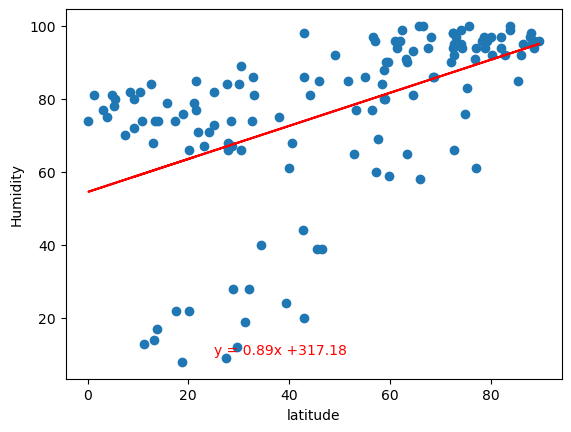

In [30]:
# Northern Hemisphere
y_values = northern_hemi_df['Humidity'].array
x_values = northern_hemi_df['latitude'].array
#finding slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
#regression values
regress_values = x_values *slope +intercept
#line equation formula
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('latitude')
plt.ylabel('Humidity')
print(f"rvalue is : {rvalue}, stderr = {stderr}")
plt.annotate(line_equation, (25,10), color='red')
print(f"yvalue = {line_eq}")

rvalue is : -0.4569284932935704, stderr= 0.0446856807019175


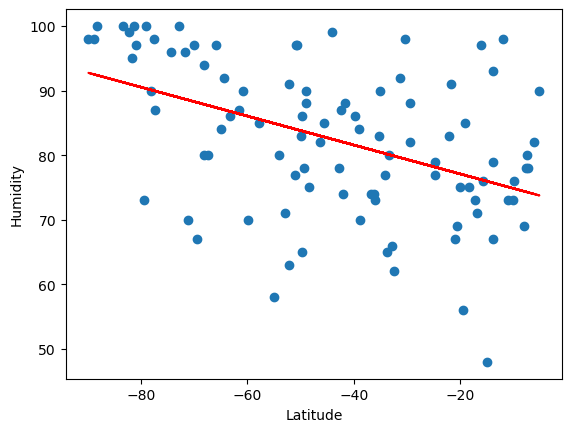

In [31]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['latitude'].array
y_value = southern_hemi_df['Humidity'].array
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
#regression values
regress_val = x_value *slope +intercept
#line equation 
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (25,10), color='red')
print(f"rvalue is : {rvalue}, stderr= {stderr}")

**Discussion about the linear relationship: the regression fit for the southern hemisphere is higher than the northern hemisphere by checking the rvalue. the std error is also lower in value than the northern hemisphere.  since some values are close to the center the linear regression model is correct for this dataset. the errors are much lower and cannot explain the dataset.

### Cloudiness vs. Latitude Linear Regression Plot

rvalue is : 0.3048062504997222, stderr = 0.11572348703820932
yvalue = y = 0.43x +50.83


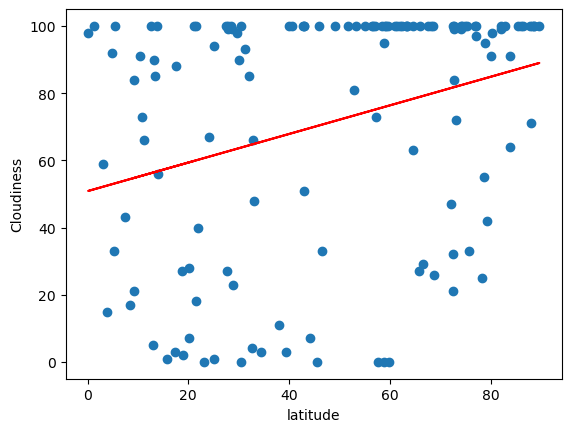

In [32]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere creating x and y values
y_values = northern_hemi_df['Cloudiness'].array
x_values = northern_hemi_df['latitude'].array
#finding slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
#regression values
regress_values = x_values *slope +intercept
#line equation formula
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
print(f"rvalue is : {rvalue}, stderr = {stderr}")
print(f"yvalue = {line_eq}")

rvalue is : -0.30225253709289573, stderr= 0.1429765312005867


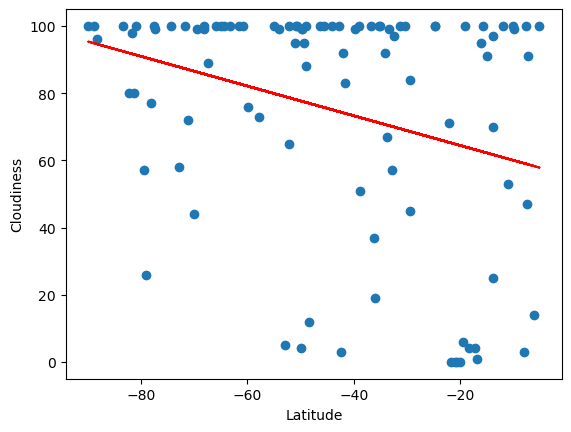

In [33]:
# Southern Hemisphere
x_value = southern_hemi_df['latitude'].array
y_value = southern_hemi_df['Cloudiness'].array
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
#regression values
regress_val = x_value *slope +intercept
#line equation 
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation, (25,10), color='red')
print(f"rvalue is : {rvalue}, stderr= {stderr}")

**Discussion about the linear relationship:  the rsquare value indicates that both northern and southern donot have a high rsquare value. there is no close fit for both hemispheres as the values are scattered from the center line. which means that there is no corelation between latitude and cloudiness than finding if another model is a better fit than linear regression.

### Wind Speed vs. Latitude Linear Regression Plot

rvalue is : -0.07810444820438284, stderr = 0.011372645294549845
yvalue = y = -0.01x +6.11


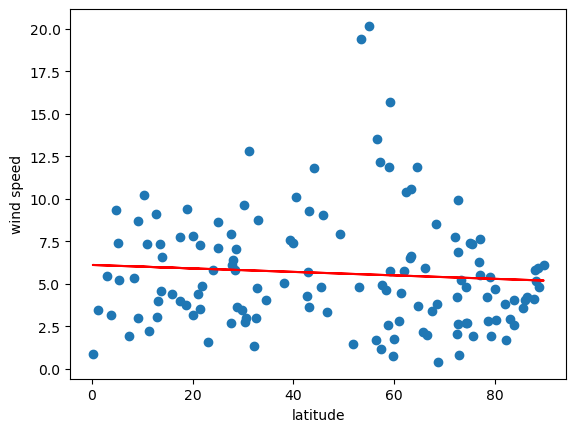

In [34]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere creating x and y values
y_values = northern_hemi_df['Wind_Speed'].array
x_values = northern_hemi_df['latitude'].array
#finding slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
#regression values
regress_values = x_values *slope +intercept
#line equation formula
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"rvalue is : {rvalue}, stderr = {stderr}")
print(f"yvalue = {line_eq}")

rvalue is : -0.1190693742611766, stderr= 0.017563593002906306


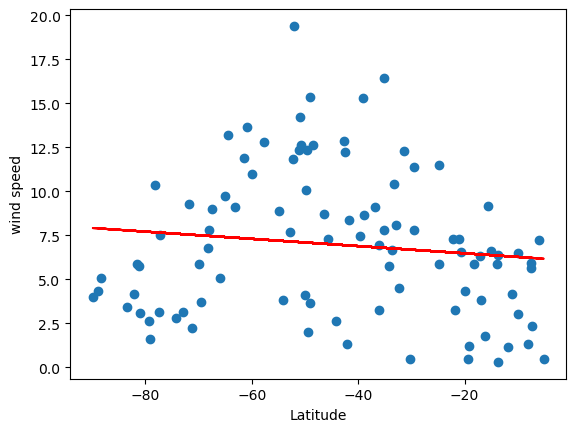

In [36]:
# Southern Hemisphere
x_value = southern_hemi_df['latitude'].array
y_value = southern_hemi_df['Wind_Speed'].array
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
#regression values
regress_val = x_value *slope +intercept
#line equation 
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_val, "r-")
plt.xlabel("Latitude")
plt.ylabel("wind speed")
plt.annotate(line_equation, (25,10), color='red')
print(f"rvalue is : {rvalue}, stderr= {stderr}")

**Discussion about the linear relationship: the linear regression fits the windspeed data very well as rsquare value is lower than 0 for both the hemisphere. the stderr is much lower for the northern than the southern hemisphere. there are some values that are closer to the zero line which makes the linear regression a valid fit for the dataset.